<a href="https://colab.research.google.com/github/alex-punchenko/my_work/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection

Implementation of Logistic Regression Model Training with Various Feature Selection Methods

Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Data Generation

In [ ]:
x_data_generated, y_data_generated = make_classification(scale=1,random_state=1)

In [ ]:
x_columns = [f'x{i}' for i in range(x_data_generated.shape[1])]
x = pd.DataFrame(x_data_generated, columns=x_columns)
y = pd.Series(y_data_generated)

In [ ]:
x

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,0.606548,0.816958,1.051321,1.657125,-0.459718,-0.588964,0.650323,0.050317,1.705484,1.417674,-0.737290,0.309817,0.778174,-1.124787,-1.283933,0.080751,0.094996,-0.364538,0.164665,-0.767804
1,-3.053764,0.921162,-1.458324,0.240506,0.612233,-0.513571,-0.192004,0.398598,0.744885,-0.999427,0.479852,-0.961264,0.578464,-1.070208,-1.287740,-1.494194,0.494342,0.204377,-1.552699,-0.446699
2,0.606404,0.680645,1.021248,1.495885,0.672620,-0.693833,-1.470237,0.599213,2.428877,0.675454,2.293718,-0.214654,-1.019520,-1.204402,-1.285590,-0.477124,0.524750,1.037039,-0.830011,-0.035990
3,1.616950,-1.515948,2.449369,0.623362,0.242669,-0.512259,0.129102,1.407540,0.201830,-0.434957,0.502741,-1.219744,0.109403,-0.024881,0.676609,-0.198838,-0.545774,-0.203394,1.558806,-0.700399
4,-0.828148,-1.569173,1.762609,-1.223880,1.127751,-0.921486,-0.447308,-0.982161,0.050293,0.558264,-0.110728,0.680979,-0.474590,-0.540548,0.284574,0.522655,-0.357514,0.098942,-0.429386,-0.355413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.017818,0.752217,0.112368,-1.067877,0.394428,-0.584312,0.457947,0.572963,0.725523,-0.076679,-0.600139,-0.036818,0.571805,-1.090944,-1.226844,0.915499,-0.150504,0.185536,0.146765,-0.438200
96,1.829906,0.709932,0.759494,0.590494,-0.449346,0.755597,-1.136433,-0.952084,1.085251,1.077377,-1.425156,-1.102970,0.439127,0.690209,0.231198,-1.089551,-1.103216,0.834283,0.715333,-1.389550
97,-2.308039,-1.423689,1.142564,0.459782,-0.120889,-0.165523,0.428659,0.021172,-0.260561,-0.206331,0.327068,-0.691269,1.797919,0.391846,0.970792,0.814625,-2.514925,-0.247016,-0.379120,0.276103
98,-1.537029,2.149570,0.324554,-0.349094,0.988578,0.462844,0.121255,-0.889331,-0.242826,0.239045,0.503906,2.113824,0.913951,-0.311463,-1.239471,0.514865,0.505363,2.153233,1.319726,-0.879730


# Evaluation Without Feature Selection

In [ ]:
full_data_score = cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()
full_data_score

0.9

# Using Statistical Methods for Feature Selection

## Correlation Selection

In [ ]:
x_corr = x.corr()

corrs = [(round(x_corr.iloc[row,col],3), row, col)
        for row in range(1, 20)
            for col in range(row)]
top10 = sorted(corrs, key=lambda x: abs(x[0]), reverse=True)[:10]

top10_corr_df = (pd.DataFrame(
        data = top10,
        columns = ['Correlation','First_feature','Second_feature'])
        .sort_values(by='Correlation', key=lambda x: abs(x), ascending=False)
)

top10_corr_df

,Correlation,First_feature,Second_feature
0,0.928,13,5
1,0.899,14,13
2,0.670,14,5
3,-0.529,14,1
4,-0.276,6,1
5,0.275,5,1
6,0.255,7,5
7,-0.249,6,5
8,0.237,7,0
9,0.225,7,1


### Correlation Matrix

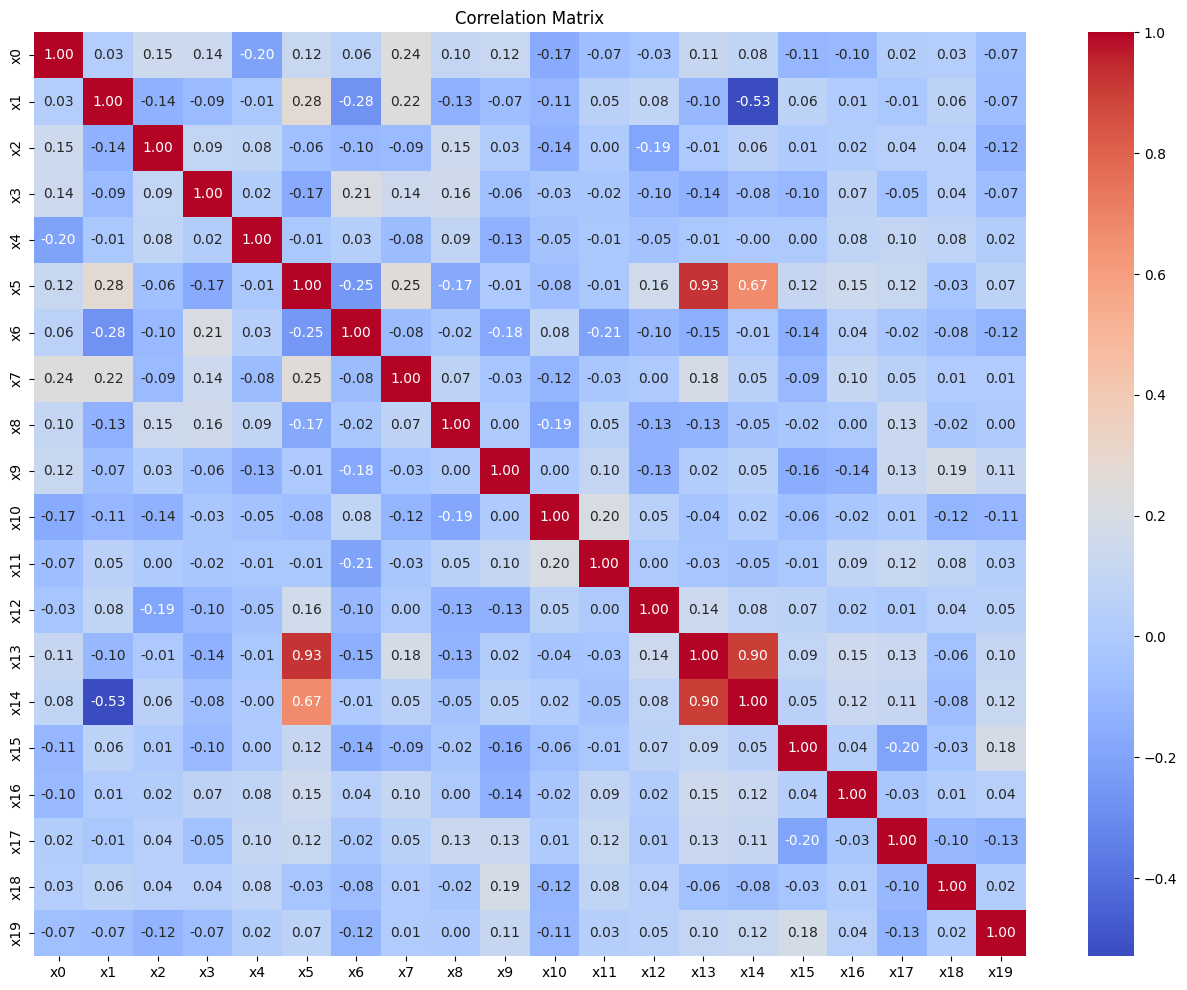

In [ ]:
plt.figure(figsize=(16, 12))

sns.heatmap(x_corr, annot=True, fmt='.2f',cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show()

Highly Correlated Features x14, x5

In [ ]:
col_del = ['x14','x5']

In [ ]:
corr_select_score = cross_val_score(LogisticRegression(),x.drop(columns=col_del), y, scoring='accuracy').mean()
corr_select_score

0.9

## Dropping Low-Variance Features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
feature_selector = VarianceThreshold(threshold=1)
feature_selector.fit(x)

VarianceThreshold(threshold=1)

In [ ]:
feature_selector_col = feature_selector.get_feature_names_out()

In [ ]:
variance_threshold_score = cross_val_score(LogisticRegression(), x[feature_selector_col], y, scoring='accuracy').mean()
variance_threshold_score

0.9400000000000001

# Feature Selection Based on Analysis of Variance

## Selecting the Top 5 Features Using the Scoring Function f_classif for Classification

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
sb = SelectKBest(f_classif, k=5)

In [ ]:
sb.fit(x,y)

SelectKBest(k=5)

In [ ]:
out_col = sb.get_feature_names_out()
out_col

array(['x1', 'x5', 'x6', 'x7', 'x14'], dtype=object)

In [ ]:
select_kbest_score = cross_val_score(LogisticRegression(),x[out_col], y, scoring='accuracy').mean()
select_kbest_score

0.96

# Feature Selection Using Models

## Feature Selection Using Logistic Regression with L1 Regularization

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
lr_l1 =LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
lr_l1.fit(x,y)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
sfm = SelectFromModel(estimator=lr_l1)

In [ ]:
sfm.fit(x,y)

SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear'))

In [ ]:
out_col = sfm.get_feature_names_out()

In [ ]:
sfm_lrL1_score = cross_val_score(LogisticRegression(),x[out_col], y, scoring='accuracy').mean()
sfm_lrL1_score

0.95

## Feature Selection Using RandomForest Model and the Built-in feature_importances_ Attribute

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x,y)

RandomForestClassifier()

In [ ]:
feature_names = [f'x{i}' for i in range(x.shape[1])]
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

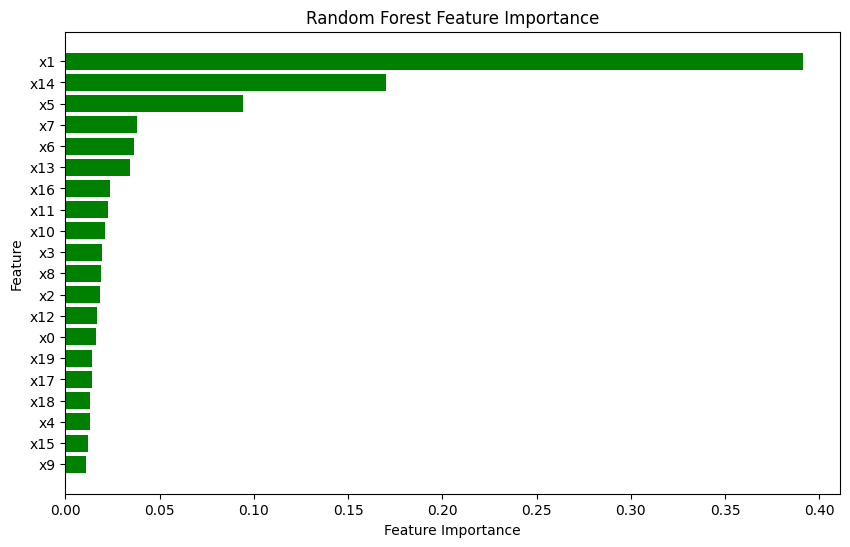

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'],color='g')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
col_del = list(feature_importances.sort_values(by='Importance')['Feature'][:10])

In [ ]:
rfc_fi_score = cross_val_score(LogisticRegression(),x.drop(columns=col_del), y, scoring='accuracy').mean()
corr_select_score

0.9

# Feature Selection Using Sequential Feature Selector

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs = SequentialFeatureSelector(estimator=LogisticRegression())

In [ ]:
sfs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression())

In [ ]:
out_col = sfs.get_feature_names_out()
out_col

array(['x0', 'x1', 'x3', 'x4', 'x5', 'x6', 'x8', 'x10', 'x11', 'x12'],
      dtype=object)

In [ ]:
sfs_score = cross_val_score(LogisticRegression(),x[out_col], y, scoring='accuracy').mean()
sfs_score

0.96

#Conclusion

In [ ]:
models = ['Full Data', 'Correlation Select', 'Variance Threshold', 'SelectKBest', 'SFM with LR L1', 'RFC with Feature Importance', 'SFS']
scores = [full_data_score,corr_select_score,variance_threshold_score,select_kbest_score,sfm_lrL1_score,rfc_fi_score,sfs_score]

In [ ]:
df_scores = pd.DataFrame({'Model': models, 'Score': scores})

In [ ]:
df_scores.sort_values(by='Score',ascending=False)

,Model,Score
3,SelectKBest,0.96
6,SFS,0.96
4,SFM with LR L1,0.95
5,RFC with Feature Importance,0.95
2,Variance Threshold,0.94
0,Full Data,0.90
1,Correlation Select,0.90


In this case, it can be observed that using feature selection can improve model performance and speed up processing.